<a href="https://colab.research.google.com/github/jojonison/DataScienceActivities/blob/main/322_Prelim_Exer_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas
!pip install matplotlib
!pip install seaborn


In [ ]:
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = 'data.csv'  # Update this with the actual path to your data.csv file
df = pd.read_csv(file_path)

# Group by 'Product line' and calculate the desired measures
grouped_data = df.groupby('Product line')['Total'].agg(['sum', 'mean', 'median', 'var', 'std']).reset_index()

# Display the results
print(grouped_data)


             Product line         sum        mean     median           var  \
0  Electronic accessories  54337.5315  319.632538  241.21650  60489.251154   
1     Fashion accessories  54305.8950  305.089298  211.64850  59323.485271   
2      Food and beverages  56144.8440  322.671517  252.48825  61086.968348   
3       Health and beauty  49193.7390  323.643020  272.30700  56424.688638   
4      Home and lifestyle  53861.9130  336.636956  258.18975  64821.501916   
5       Sports and travel  55122.8265  332.065220  270.93150  61690.303338   

          std  
0  245.945626  
1  243.564130  
2  247.157780  
3  237.538815  
4  254.600671  
5  248.375328  


Counts of each unique product line in each unique branch:
Branch                   A   B   C
Product line                      
Electronic accessories  60  55  55
Fashion accessories     51  62  65
Food and beverages      58  50  66
Health and beauty       47  53  52
Home and lifestyle      65  50  45
Sports and travel       59  62  45

Table for the measures being graphed:
             Product line         sum        mean     median           var  \
0  Electronic accessories  54337.5315  319.632538  241.21650  60489.251154   
1     Fashion accessories  54305.8950  305.089298  211.64850  59323.485271   
2      Food and beverages  56144.8440  322.671517  252.48825  61086.968348   
3       Health and beauty  49193.7390  323.643020  272.30700  56424.688638   
4      Home and lifestyle  53861.9130  336.636956  258.18975  64821.501916   
5       Sports and travel  55122.8265  332.065220  270.93150  61690.303338   

          std  
0  245.945626  
1  243.564130  
2  247.157780  
3  237.53881

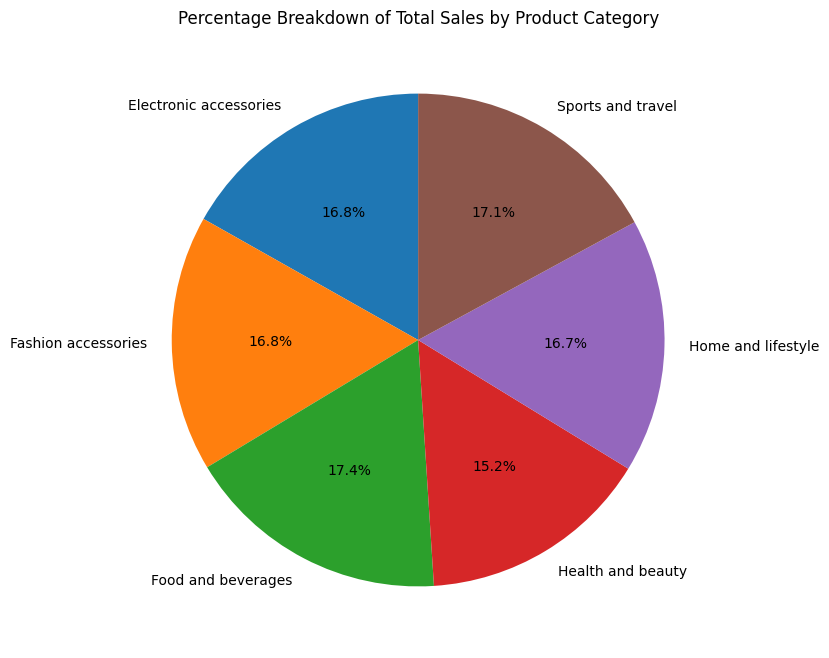

Pie chart shows the percentage breakdown of total sales by product category.


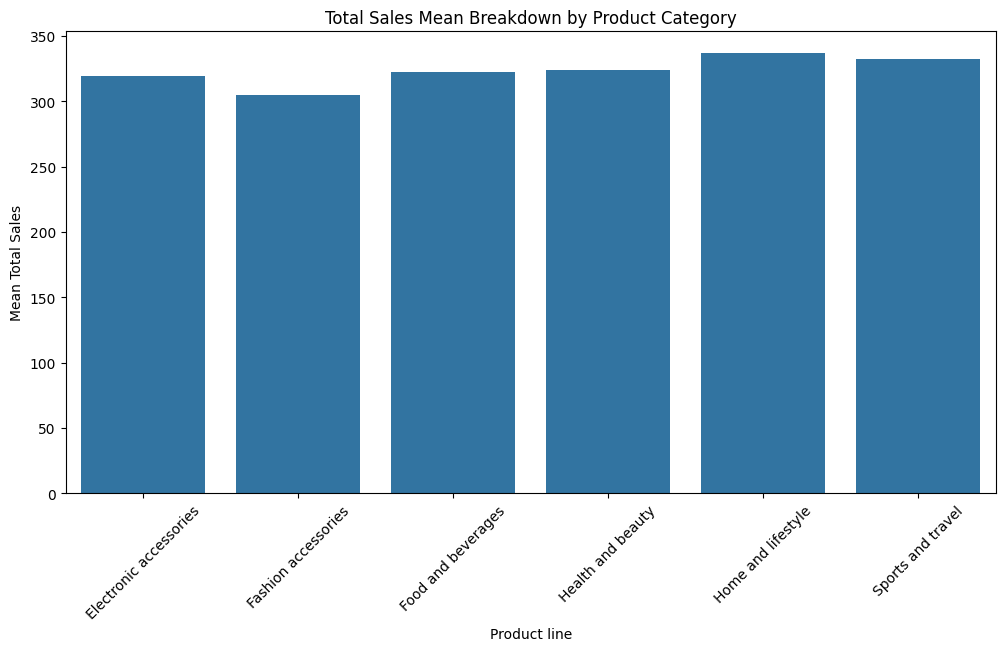

Clustered bar graph displays the mean breakdown of total sales by product category.


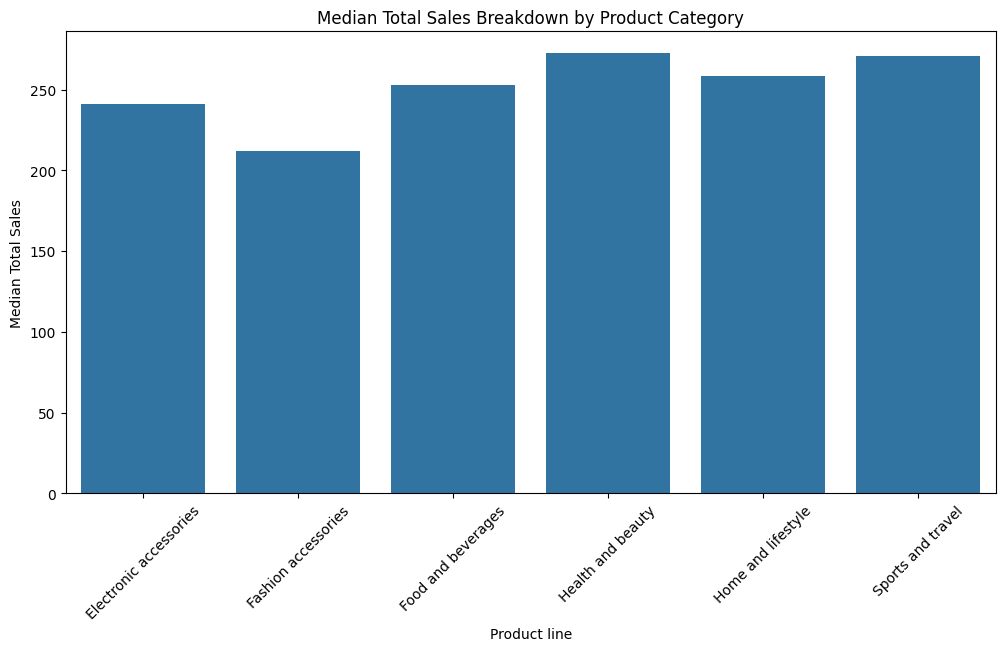

Clustered column graph shows the median breakdown of total sales by product category.


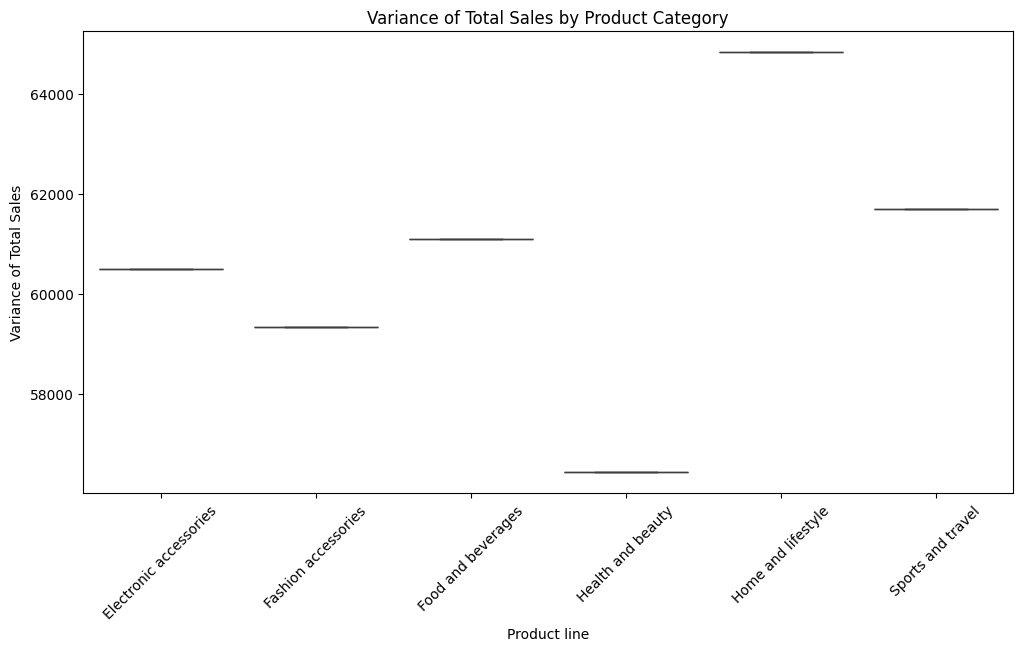

Box and whisker graph displays the variance of total sales by product category.


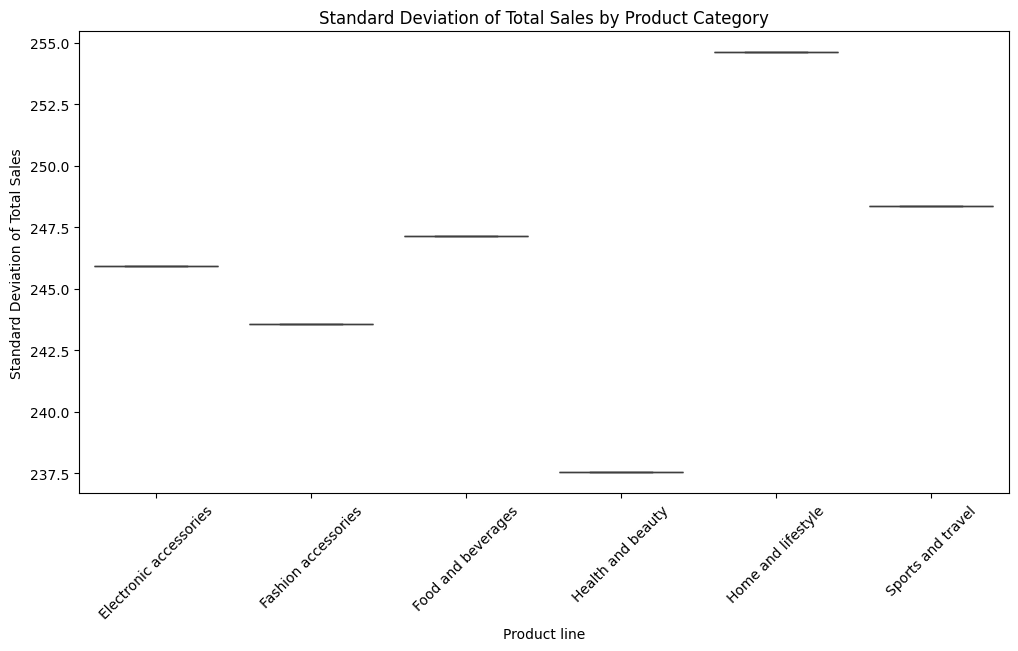

Box and whisker graph shows the standard deviation of total sales by product category.


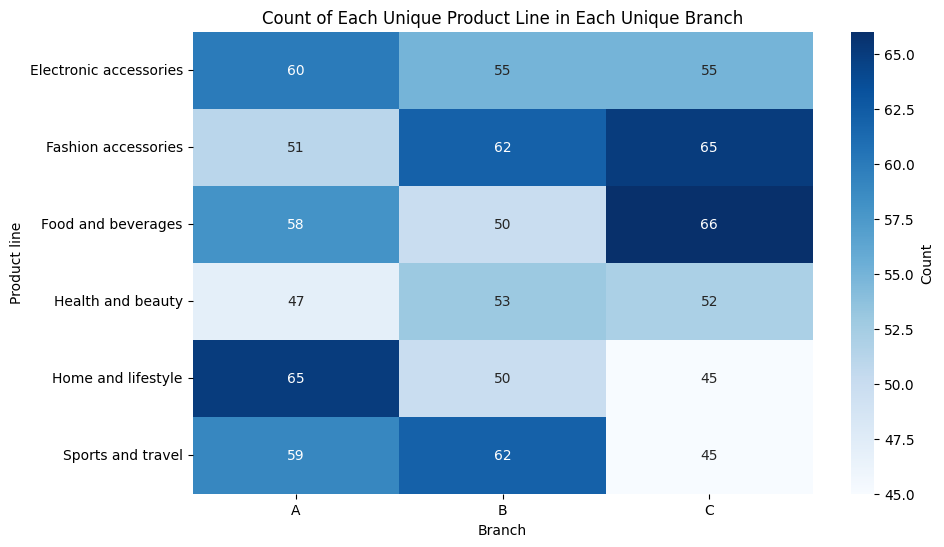

Heatmap displays counts of each unique product line in each unique branch.


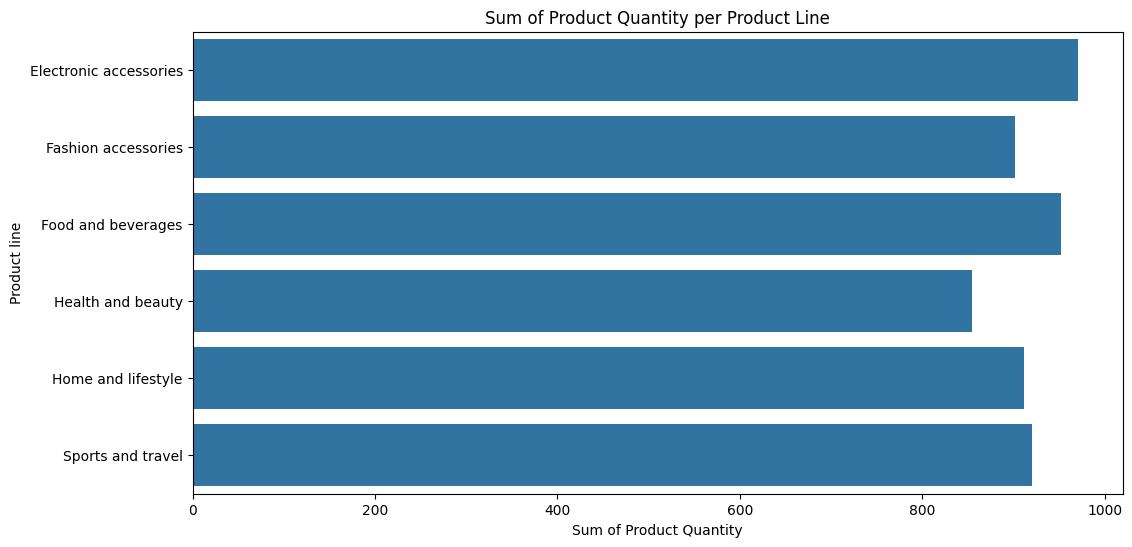

Horizontal clustered bar graph shows the sum of product quantity per product line.


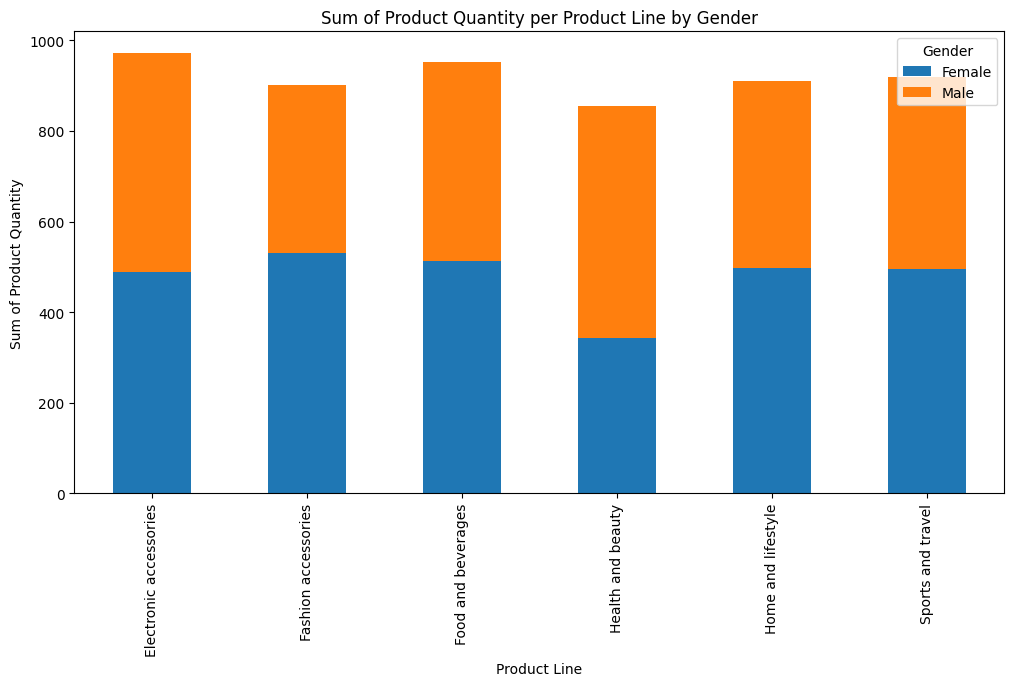

Bar plot displays the sum of product quantity per product line by gender.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV file into a pandas DataFrame
file_path = 'data.csv'  # Update this with the actual path to your data.csv file
df = pd.read_csv(file_path)

# Count occurrence of each unique product line in each unique branch
product_line_branch_counts = pd.crosstab(df['Product line'], df['Branch'])

# Display the counts
print("Counts of each unique product line in each unique branch:")
print(product_line_branch_counts)

# Group by 'Product line' and calculate the desired measures
grouped_data = df.groupby('Product line')['Total'].agg(['sum', 'mean', 'median', 'var', 'std']).reset_index()

# Display the table for the measures being graphed
print("\nTable for the measures being graphed:")
print(grouped_data)

# 1. Pie chart: Percentage breakdown of total sales by product category
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['sum'], labels=grouped_data['Product line'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Breakdown of Total Sales by Product Category')
plt.show()
print("Pie chart shows the percentage breakdown of total sales by product category.")

# 2. Clustered bar graph: Total sales mean breakdown by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='mean', data=grouped_data)
plt.title('Total Sales Mean Breakdown by Product Category')
plt.ylabel('Mean Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Clustered bar graph displays the mean breakdown of total sales by product category.")

# 3. Clustered column graph: Median total sales breakdown by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='median', data=grouped_data)
plt.title('Median Total Sales Breakdown by Product Category')
plt.ylabel('Median Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Clustered column graph shows the median breakdown of total sales by product category.")

# 4. Box and whisker graph: Variance of total sales by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='var', data=grouped_data)
plt.title('Variance of Total Sales by Product Category')
plt.ylabel('Variance of Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Box and whisker graph displays the variance of total sales by product category.")

# 5. Box and whisker graph: Standard Deviation of total sales by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='std', data=grouped_data)
plt.title('Standard Deviation of Total Sales by Product Category')
plt.ylabel('Standard Deviation of Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Box and whisker graph shows the standard deviation of total sales by product category.")

# Heatmap: Counts of each unique product line in each unique branch
plt.figure(figsize=(10, 6))
sns.heatmap(product_line_branch_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Count of Each Unique Product Line in Each Unique Branch')
plt.show()
print("Heatmap displays counts of each unique product line in each unique branch.")

# 6. Horizontal Clustered bar graph: Sum of Product Quantity per Product Line
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Product line', data=df.groupby('Product line')['Quantity'].sum().reset_index())
plt.title('Sum of Product Quantity per Product Line')
plt.xlabel('Sum of Product Quantity')
plt.show()
print("Horizontal clustered bar graph shows the sum of product quantity per product line.")

# 7. Bar plot: Sum of Product Quantity per Product Line by Gender
quantity_sum_per_line_gender = df.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()
quantity_sum_per_line_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sum of Product Quantity per Product Line by Gender')
plt.ylabel('Sum of Product Quantity')
plt.xlabel('Product Line')
plt.show()
print("Bar plot displays the sum of product quantity per product line by gender.")


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load the CSV file into a pandas DataFrame
file_path = 'data.csv'  # Update this with the actual path to your data.csv file
df = pd.read_csv(file_path)
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
# Count occurrence of each unique product line in each unique branch
product_line_branch_counts = pd.crosstab(df['Product line'], df['Branch'])

# Display the counts
print("Counts of each unique product line in each unique branch:")
print(product_line_branch_counts)



Counts of each unique product line in each unique branch:
Branch                   A   B   C
Product line                      
Electronic accessories  60  55  55
Fashion accessories     51  62  65
Food and beverages      58  50  66
Health and beauty       47  53  52
Home and lifestyle      65  50  45
Sports and travel       59  62  45


In [ ]:
# Group by 'Product line' and calculate the desired measures
grouped_data = df.groupby('Product line')['Total'].agg(['sum', 'mean', 'median', 'var', 'std']).reset_index()

# Display the table for the measures being graphed
print("\nTable for the measures being graphed:")
print(grouped_data)


Table for the measures being graphed:
             Product line         sum        mean     median           var  \
0  Electronic accessories  54337.5315  319.632538  241.21650  60489.251154   
1     Fashion accessories  54305.8950  305.089298  211.64850  59323.485271   
2      Food and beverages  56144.8440  322.671517  252.48825  61086.968348   
3       Health and beauty  49193.7390  323.643020  272.30700  56424.688638   
4      Home and lifestyle  53861.9130  336.636956  258.18975  64821.501916   
5       Sports and travel  55122.8265  332.065220  270.93150  61690.303338   

          std  
0  245.945626  
1  243.564130  
2  247.157780  
3  237.538815  
4  254.600671  
5  248.375328  


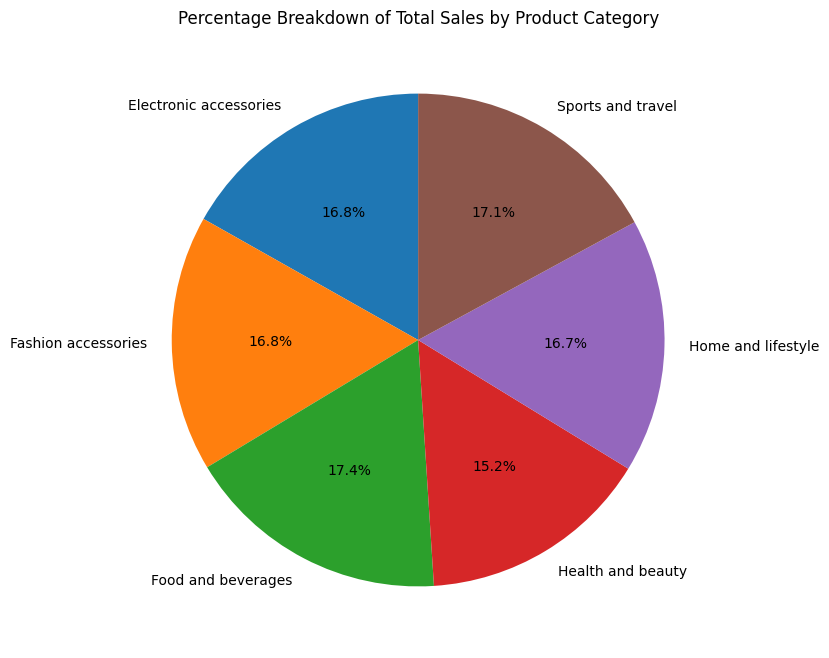

Pie chart shows the percentage breakdown of total sales by product category.


In [ ]:
# 1. Pie chart: Percentage breakdown of total sales by product category
plt.figure(figsize=(8, 8))
plt.pie(grouped_data['sum'], labels=grouped_data['Product line'], autopct='%1.1f%%', startangle=90)
plt.title('Percentage Breakdown of Total Sales by Product Category')
plt.show()
print("Pie chart shows the percentage breakdown of total sales by product category.")

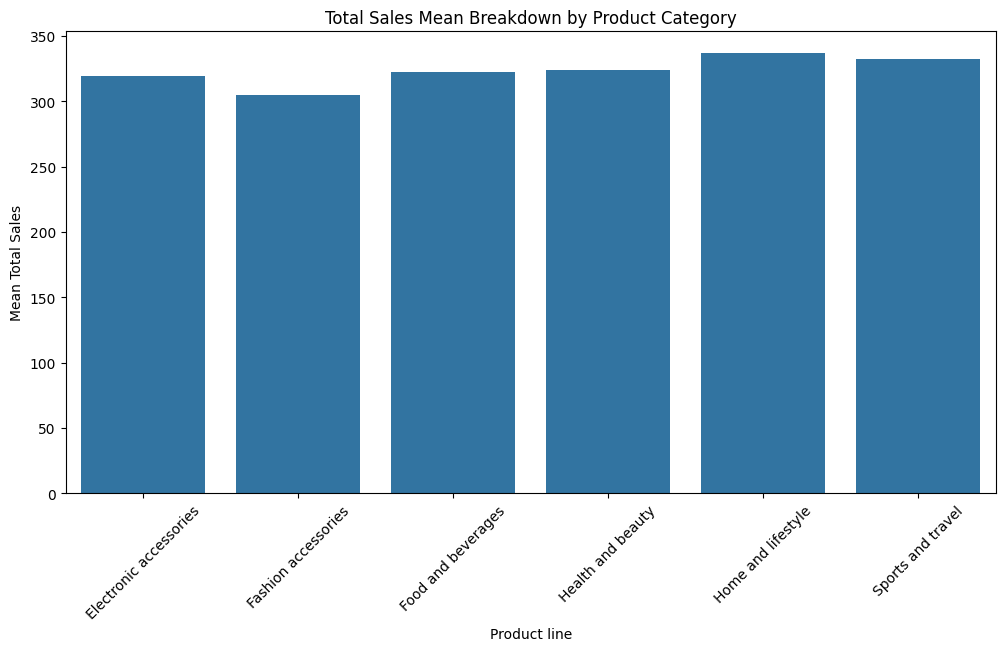

Clustered bar graph displays the mean breakdown of total sales by product category.


In [ ]:
# 2. Clustered bar graph: Total sales mean breakdown by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='mean', data=grouped_data)
plt.title('Total Sales Mean Breakdown by Product Category')
plt.ylabel('Mean Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Clustered bar graph displays the mean breakdown of total sales by product category.")

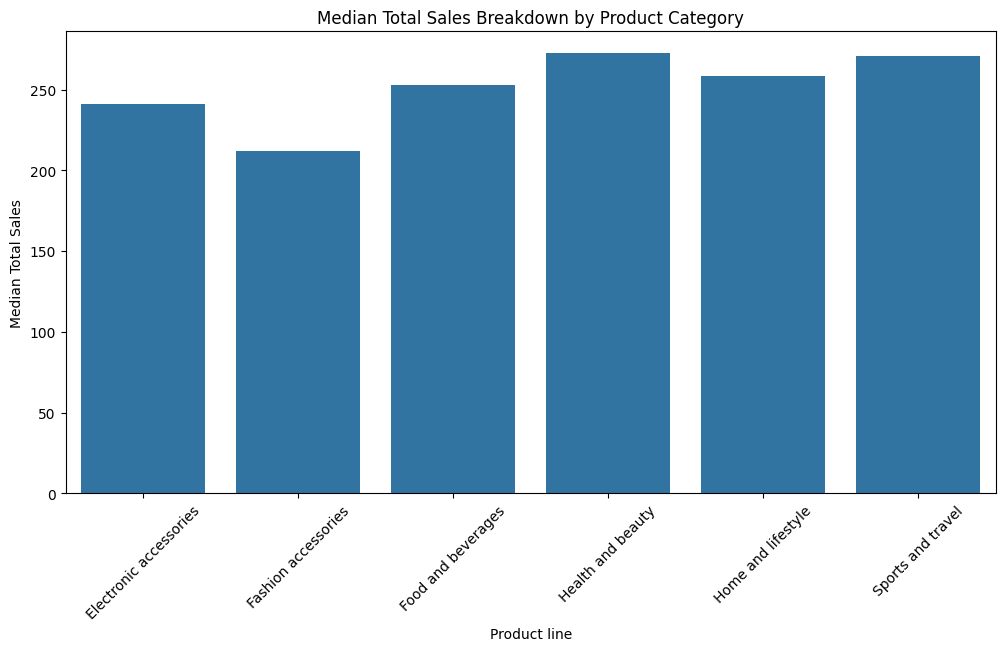

Clustered column graph shows the median breakdown of total sales by product category.


In [ ]:
# 3. Clustered column graph: Median total sales breakdown by product category
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='median', data=grouped_data)
plt.title('Median Total Sales Breakdown by Product Category')
plt.ylabel('Median Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Clustered column graph shows the median breakdown of total sales by product category.")

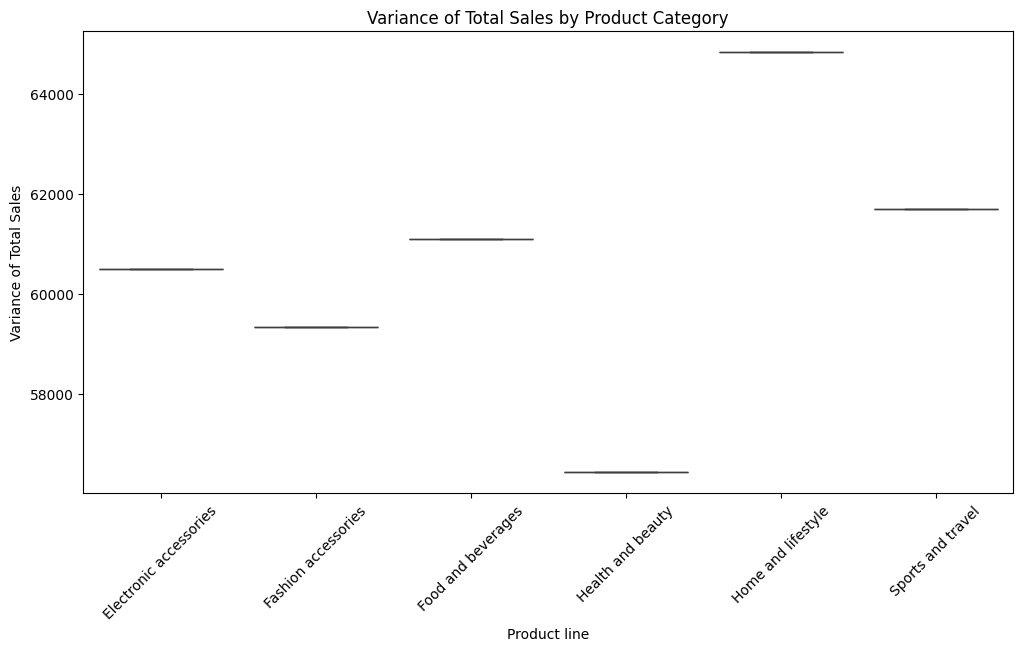

Box and whisker graph displays the variance of total sales by product category.


In [ ]:
# 4. Box and whisker graph: Variance of total sales by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='var', data=grouped_data)
plt.title('Variance of Total Sales by Product Category')
plt.ylabel('Variance of Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Box and whisker graph displays the variance of total sales by product category.")

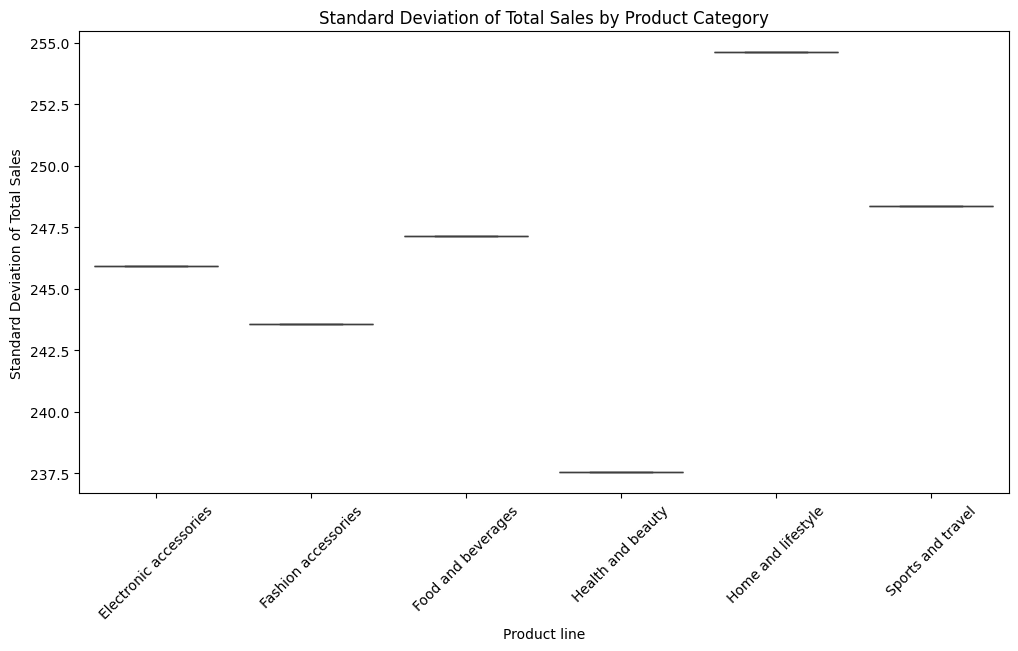

Box and whisker graph shows the standard deviation of total sales by product category.


In [ ]:
# 5. Box and whisker graph: Standard Deviation of total sales by product category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Product line', y='std', data=grouped_data)
plt.title('Standard Deviation of Total Sales by Product Category')
plt.ylabel('Standard Deviation of Total Sales')
plt.xticks(rotation=45)
plt.show()
print("Box and whisker graph shows the standard deviation of total sales by product category.")

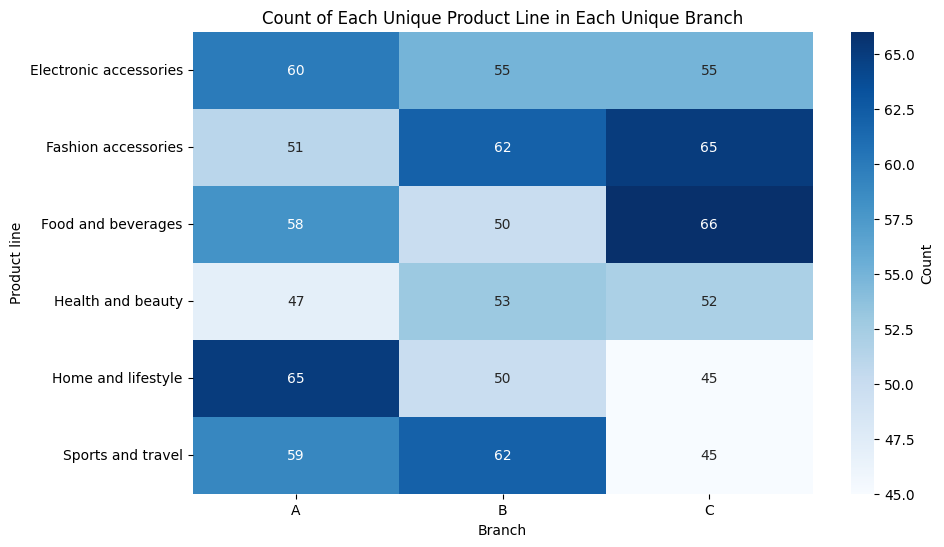

Heatmap displays counts of each unique product line in each unique branch.


In [ ]:
# Heatmap: Counts of each unique product line in each unique branch
plt.figure(figsize=(10, 6))
sns.heatmap(product_line_branch_counts, annot=True, fmt='d', cmap='Blues', cbar_kws={'label': 'Count'})
plt.title('Count of Each Unique Product Line in Each Unique Branch')
plt.show()
print("Heatmap displays counts of each unique product line in each unique branch.")

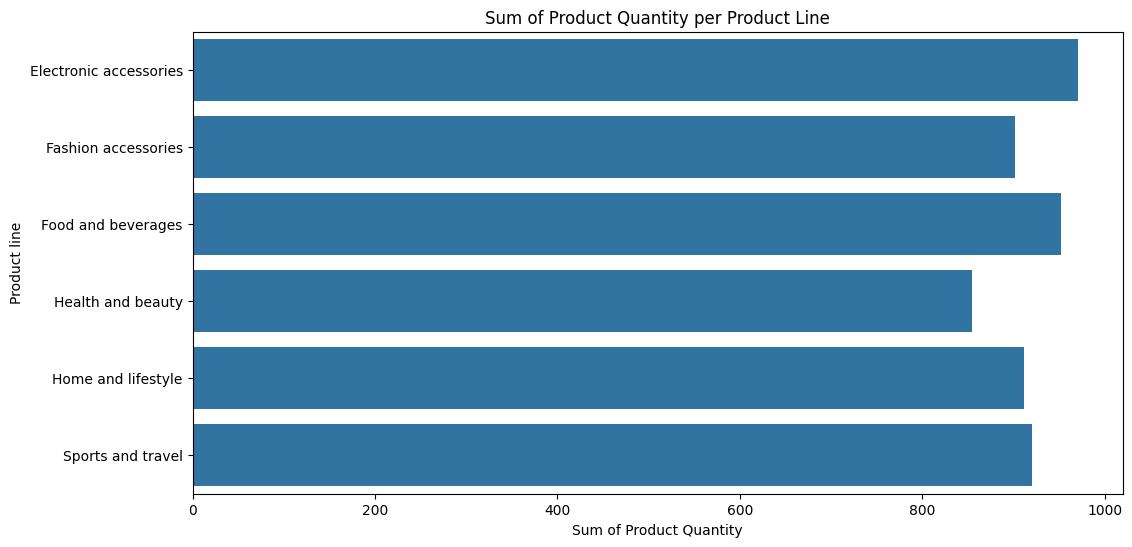

Horizontal clustered bar graph shows the sum of product quantity per product line.


In [ ]:
# 6. Horizontal Clustered bar graph: Sum of Product Quantity per Product Line
plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y='Product line', data=df.groupby('Product line')['Quantity'].sum().reset_index())
plt.title('Sum of Product Quantity per Product Line')
plt.xlabel('Sum of Product Quantity')
plt.show()
print("Horizontal clustered bar graph shows the sum of product quantity per product line.")

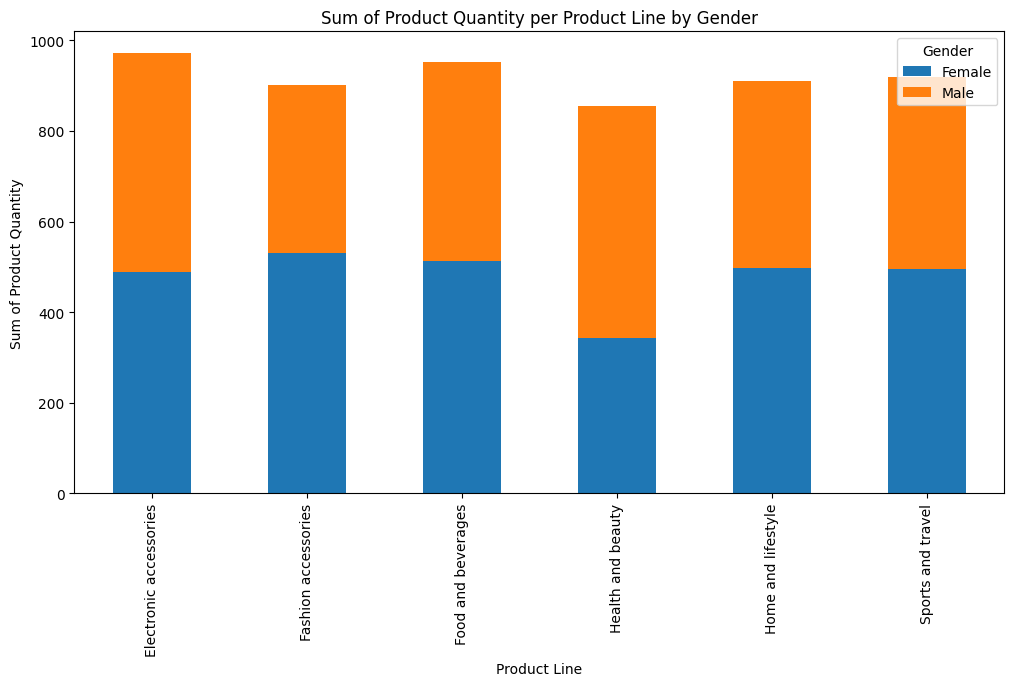

Bar plot displays the sum of product quantity per product line by gender.


In [ ]:
# 7. Bar plot: Sum of Product Quantity per Product Line by Gender
quantity_sum_per_line_gender = df.groupby(['Product line', 'Gender'])['Quantity'].sum().unstack()
quantity_sum_per_line_gender.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Sum of Product Quantity per Product Line by Gender')
plt.ylabel('Sum of Product Quantity')
plt.xlabel('Product Line')
plt.show()
print("Bar plot displays the sum of product quantity per product line by gender.")